## 0.Prepare the dataset

Dataset Link:

International football results from 1872 to 2024 : https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017

In [214]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [215]:
#Reading the data
results = pd.read_csv('results.csv')

## 1. Looking at the Data

In [216]:
#Printing the first 5 rows of the data
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [217]:
#Change the type of date column to datetime
results['date']=pd.to_datetime(results['date'])

In [218]:
#Extracting the year from the date column
results['year'] = results['date'].dt.year

In [219]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47777 entries, 0 to 47776
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        47777 non-null  datetime64[ns]
 1   home_team   47777 non-null  object        
 2   away_team   47777 non-null  object        
 3   home_score  47777 non-null  int64         
 4   away_score  47777 non-null  int64         
 5   tournament  47777 non-null  object        
 6   city        47777 non-null  object        
 7   country     47777 non-null  object        
 8   neutral     47777 non-null  bool          
 9   year        47777 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 3.1+ MB


In [220]:
results.describe().T

,count,mean,min,25%,50%,75%,max,std
date,47777,1993-05-16 02:57:45.952236416,1872-11-30 00:00:00,1979-09-26 00:00:00,1999-10-09 00:00:00,2012-06-03 00:00:00,2024-10-15 00:00:00,NaN
home_score,47777.0,1.757896,0.0,1.0,1.0,2.0,31.0,1.772524
away_score,47777.0,1.181636,0.0,0.0,1.0,2.0,21.0,1.399827
year,47777.0,1992.844151,1872.0,1979.0,1999.0,2012.0,2024.0,25.099826


In [221]:
results.shape

(47777, 10)

In [222]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year'],
      dtype='object')

In [223]:
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int32
dtype: object

In [224]:
categorical_features = []
numerical_features = []

for col in results.columns:
    if (results[col].dtype == "object") or (results[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [225]:
categorical_features, numerical_features

(['home_team', 'away_team', 'tournament', 'city', 'country'],
 ['date', 'home_score', 'away_score', 'neutral', 'year'])

## 2.Missing Values Analysis

In [226]:
#Checking for missing values
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
dtype: int64

In [227]:
#Import random missing values
import random

def add_random_missing_values(dataframe: pd.DataFrame, 
                              missing_rate: float = 0.05, 
                              seed: int = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05
        seed (int): Seed for random number generator. Defaults to 42.
    
    Returns:
        pd.DataFrame: DataFrame with random missing values.
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    results_size = dataframe.size
    num_missing = int(results_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

results = add_random_missing_values(dataframe=results, missing_rate=0.03)

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_5044/2603528716.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_missing.iat[row_idx, col_idx] = np.nan


In [228]:
results.isna().sum()

date          1403
home_team     1393
away_team     1510
home_score    1389
away_score    1354
tournament    1368
city          1426
country       1403
neutral       1414
year          1440
dtype: int64

In [229]:
results.isna().sum().sum()

14100

In [230]:
# Amount of non-missing values in each column
results.notnull().sum()

date          46374
home_team     46384
away_team     46267
home_score    46388
away_score    46423
tournament    46409
city          46351
country       46374
neutral       46363
year          46337
dtype: int64

In [231]:
results[results.isnull().any(axis=1)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
2,1874-03-07,Scotland,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,1874.0
5,1876-03-25,Scotland,Wales,4.0,NaN,Friendly,Glasgow,Scotland,False,1876.0
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,NaN,1877.0
11,1879-04-05,NaN,Scotland,5.0,4.0,Friendly,London,England,False,1879.0
12,NaT,Wales,Scotland,0.0,3.0,Friendly,Wrexham,Wales,False,1879.0
...,...,...,...,...,...,...,...,...,...,...
47762,2024-10-15,Belarus,Luxembourg,1.0,1.0,UEFA Nations League,NaN,Hungary,True,2024.0
47764,NaT,Paraguay,Venezuela,2.0,1.0,FIFA World Cup qualification,Asunción,Paraguay,False,2024.0
47770,2024-10-15,NaN,North Korea,1.0,0.0,FIFA World Cup qualification,Bishkek,Kyrgyzstan,False,2024.0
47772,2024-10-15,Palestine,Kuwait,2.0,NaN,FIFA World Cup qualification,Al Rayyan,Qatar,True,2024.0


In [232]:
#Deleting the missing values
results.dropna(inplace=True)

I created random missing values, but I had to delete them because this is match data and results. Adding arbitrary values would make the data meaningless, so I chose to delete the missing values instead.

In [233]:
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
dtype: int64

In [234]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876.0
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,1877.0


## 3.Visualization Time!!

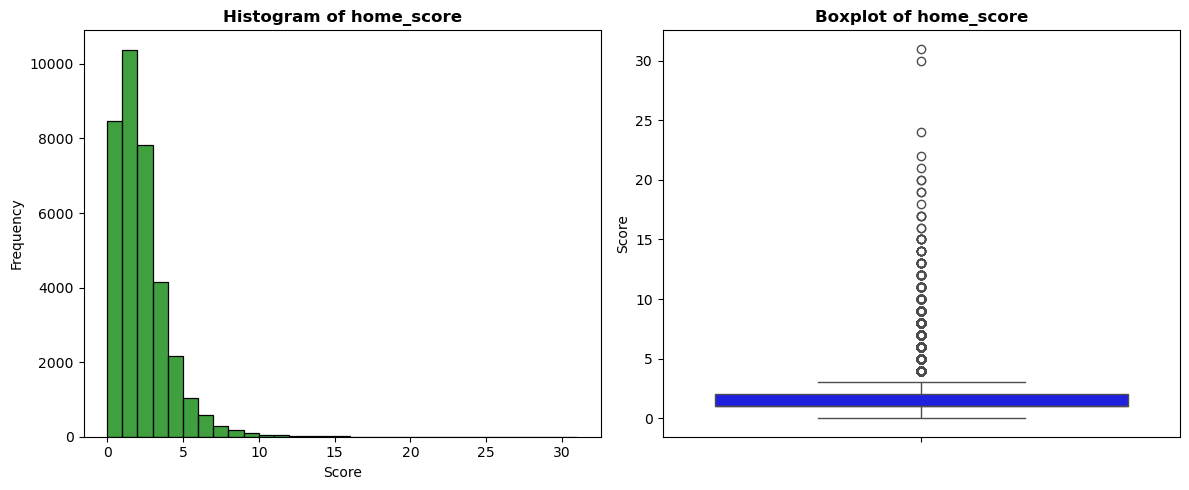

In [235]:
# Create subplots (1x2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of home scores
sns.histplot(data = results,
             x = 'home_score',
             color = 'green',
             binwidth = 1,
             ax = axes[0])
axes[0].set_title('Histogram of home_score', fontweight='bold')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

# Boxplot of home scores
sns.boxplot(data=results,
            y = 'home_score',
            color = 'blue',
            ax = axes[1])
axes[1].set_title('Boxplot of home_score', fontweight='bold')
axes[1].set_ylabel('Score')

# Adjust and show
plt.tight_layout()
plt.show()

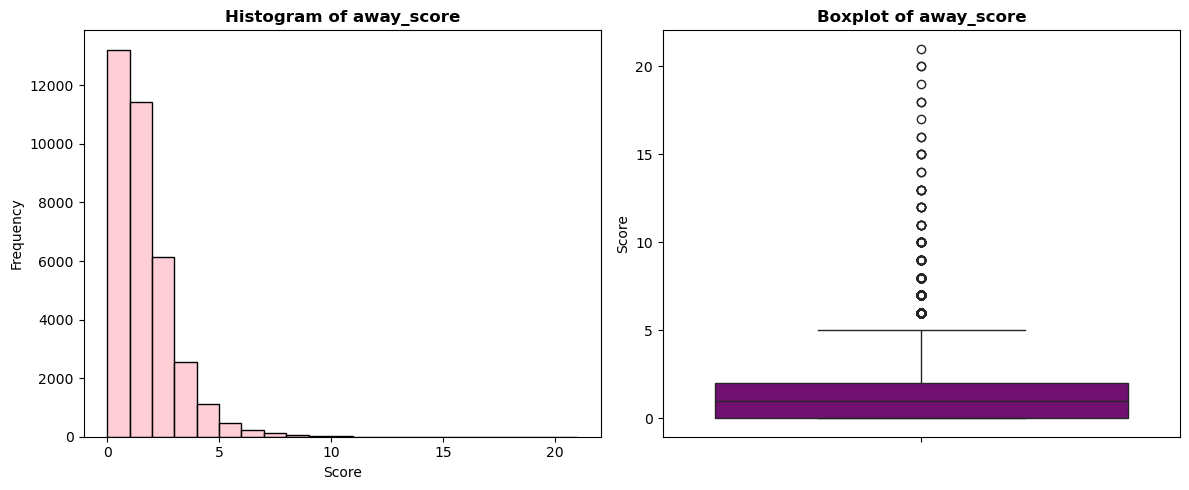

In [236]:
# Create subplots (1x2)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of away scores
sns.histplot(data = results,
             x = 'away_score',
             color = 'pink',
             binwidth = 1,
             ax = axes[0])
axes[0].set_title('Histogram of away_score', fontweight='bold')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')

# Boxplot of away scores
sns.boxplot(data = results,
            y = 'away_score',
            color = 'purple',
            ax = axes[1])
axes[1].set_title('Boxplot of away_score', fontweight='bold')
axes[1].set_ylabel('Score')

# Adjust and show
plt.tight_layout()
plt.show()

The histogram shows that, in most cases, home teams tend to score 1 to 2 goals. The distribution is positively skewed (right-skewed), meaning that most data points are concentrated on the left side, indicating that lower scores are more common. The boxplot reveals that, due to the high number of matches, scoring 4 or more goals is considered an outlier. This could be used as a criterion to determine in which matches the home team delivered a "goal shower" and which did not.

Similarly, the histogram for away scores shows that away teams also tend to score 1 to 2 goals, with a right-skewed distribution. The boxplot for away scores indicates that scoring 3 or more goals is considered an outlier for away teams.

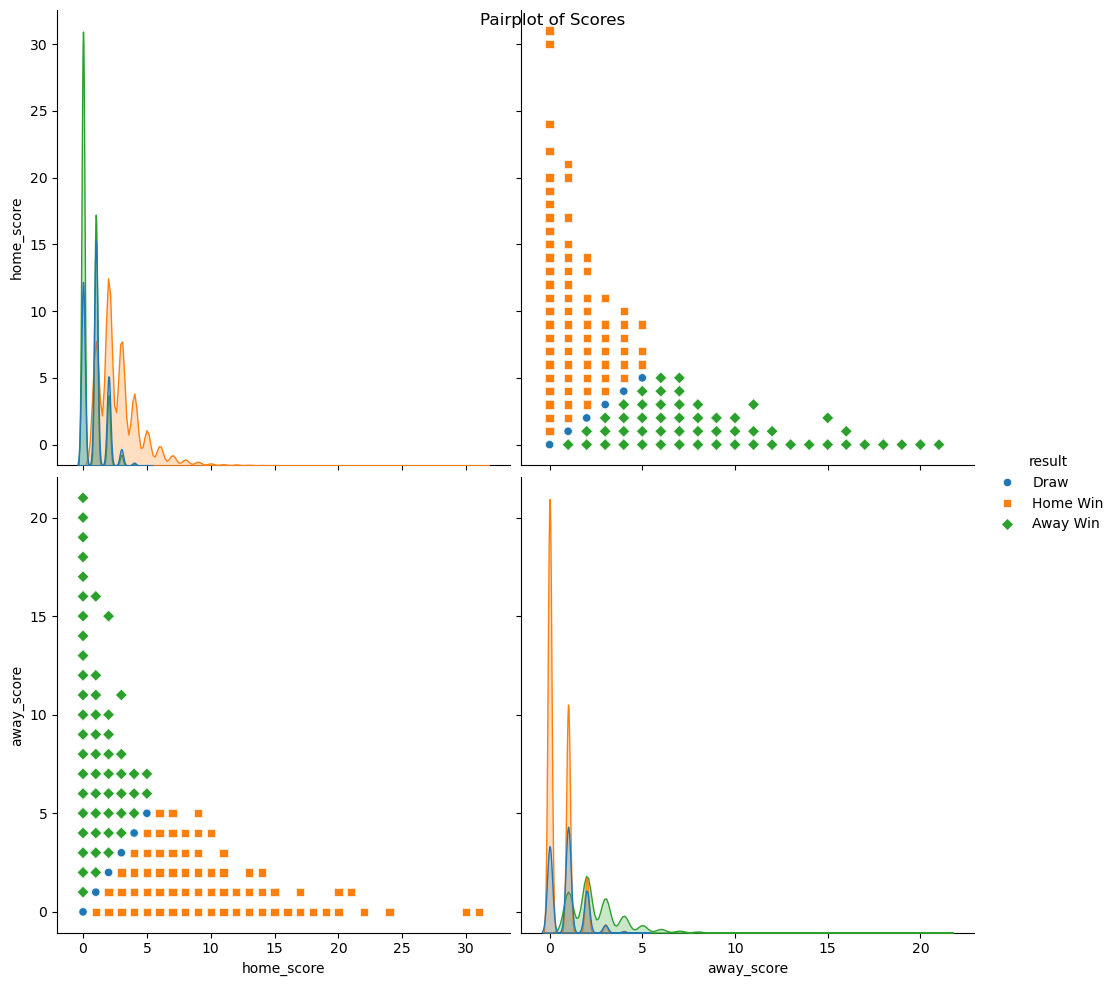

In [237]:
# Ensure the result column is created
def get_result(row):
	if row['home_score'] > row['away_score']:
		return 'Home Win'
	elif row['home_score'] < row['away_score']:
		return 'Away Win'
	else:
		return 'Draw'

results['result'] = results.apply(get_result, axis=1)

sns.pairplot(results[['home_score','away_score','result']], hue='result', markers=['o','s','D'], height=5)
plt.suptitle('Pairplot of Scores')
plt.show()

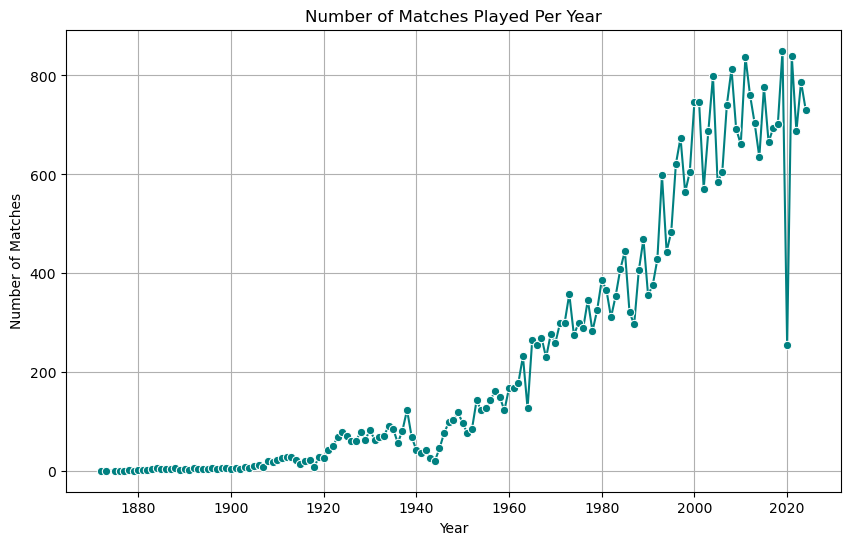

In [238]:
#Number of matches played per year
matches_per_year = results.groupby('year').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values, color='teal', marker='o')  # Use 'color' instead of 'color_palette'
plt.title('Number of Matches Played Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

The number of matches played per year has increased over time. After the end of major wars, the number of matches significantly increased. However, there was a noticeable decrease in 2020 due to the COVID-19 pandemic.

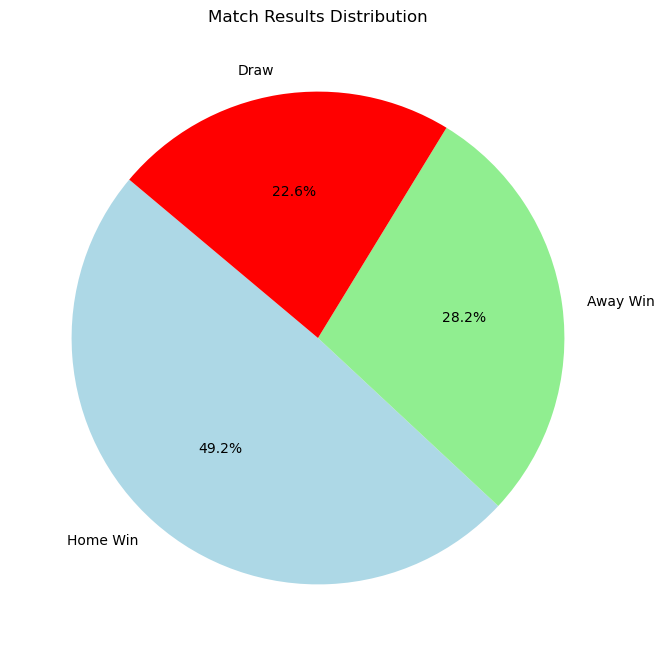

In [239]:
results_count = results['result'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
results_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'red'], startangle=140)
plt.title('Match Results Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

According to the match results distribution, the home team wins most matches. This is likely due to home advantage.

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_5044/1933787367.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='cubehelix')


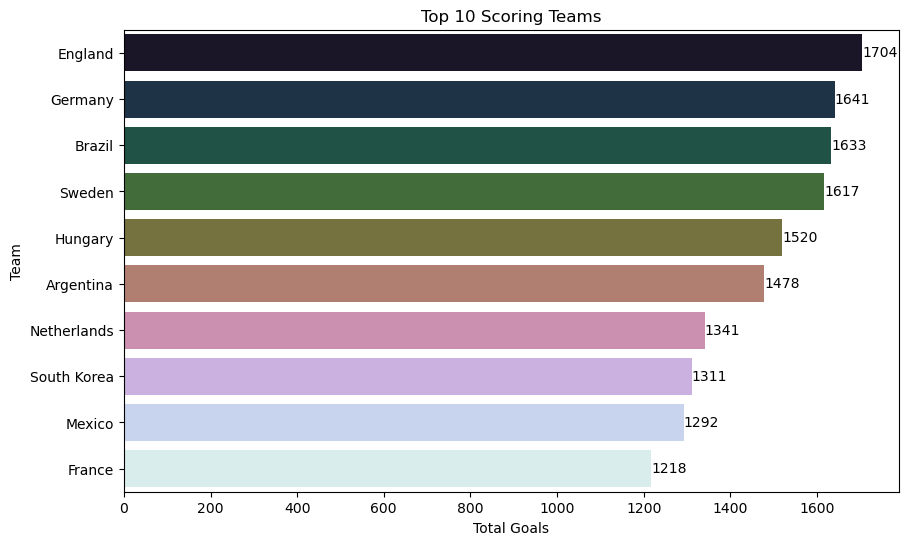

In [240]:

# Calculate total goals
results['total_goals'] = results['home_score'] + results['away_score']

# Calculate top scoring teams
top_teams = results.groupby('home_team')['home_score'].sum() + results.groupby('away_team')['away_score'].sum()
top_teams = top_teams.sort_values(ascending=False).head(10)

# Convert the values to integers
top_teams = top_teams.astype(int)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='cubehelix')
plt.title('Top 10 Scoring Teams')
plt.xlabel('Total Goals')
plt.ylabel('Team')

# Annotate the number of goals on the bars
for index, value in enumerate(top_teams.values):
    plt.text(value, index, str(value), color='black', ha='left', va='center')

plt.show()

 -England has scored the most goals with a total of 1704 goals.
 
 -Germany follows closely with 1641 goals.
 
 -Brazil is in third place with 1633 goals.

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_5044/1764637558.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tournament_counts.head(10).values, y=tournament_counts.head(10).index, palette='rocket')


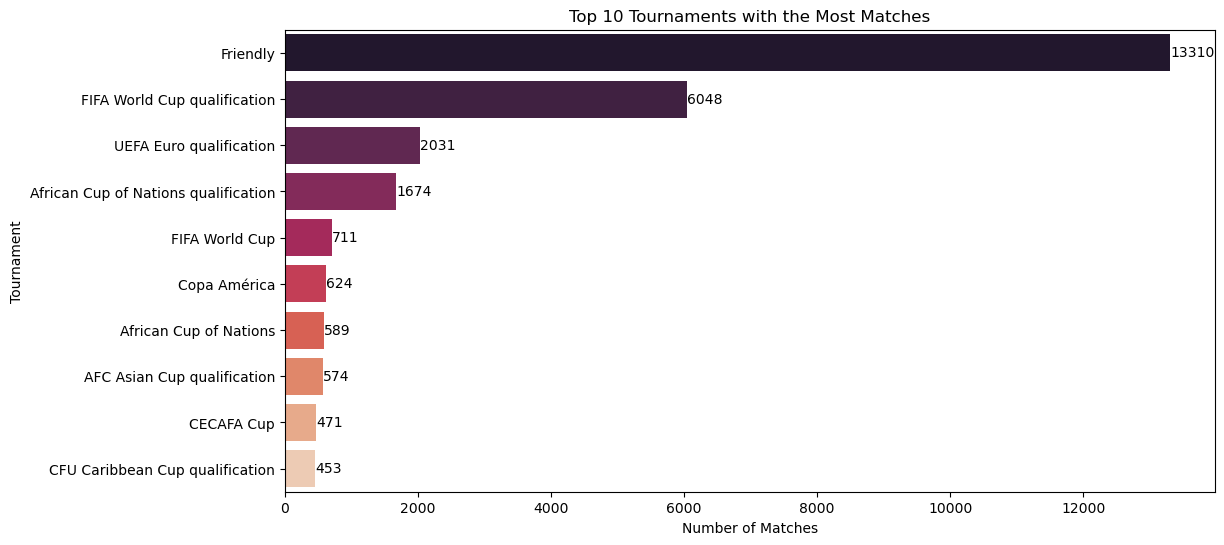

In [241]:

# Count the number of matches per tournament
tournament_counts = results['tournament'].value_counts()

# Plotting the tournaments with the most matches
plt.figure(figsize=(12, 6))
sns.barplot(x=tournament_counts.head(10).values, y=tournament_counts.head(10).index, palette='rocket')
plt.title('Top 10 Tournaments with the Most Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Tournament')

# Annotate the number of matches on the bars
for index, value in enumerate(tournament_counts.head(10).values):
    plt.text(value, index, str(value), color='black', ha='left', va='center')

plt.show()

The most matches played are friendly matches. Following them are FIFA World Cup qualification and UEFA EURO qualitication matches.

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_5044/4161536810.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_winning_teams.values, y=top_winning_teams.index, palette='viridis')


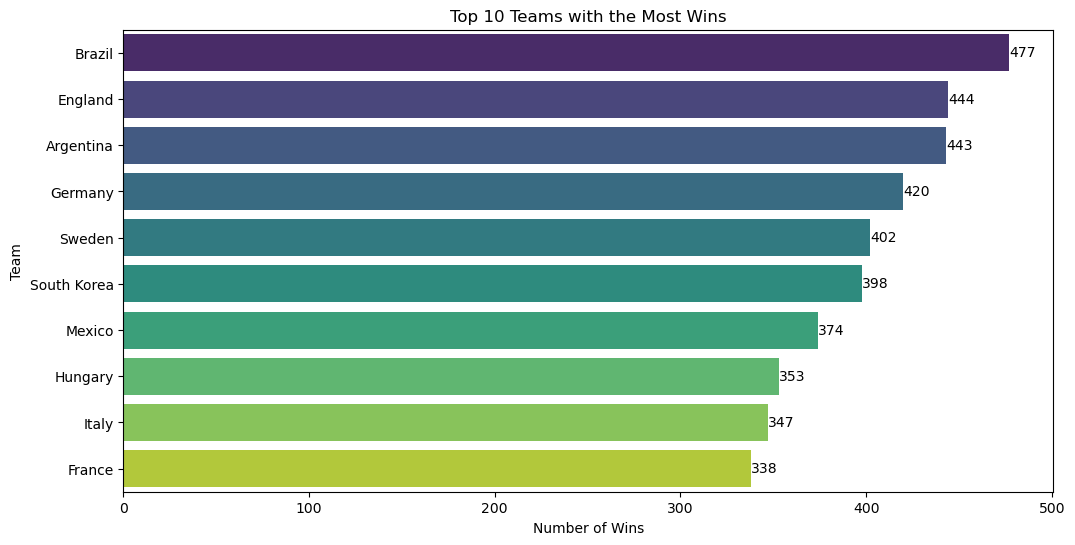

In [242]:

# Count the number of wins for each team
home_wins = results[results['result'] == 'Home Win']['home_team'].value_counts()
away_wins = results[results['result'] == 'Away Win']['away_team'].value_counts()

# Combine home and away wins
total_wins = home_wins.add(away_wins, fill_value=0).astype(int)

# Sort the teams by the number of wins
top_winning_teams = total_wins.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_winning_teams.values, y=top_winning_teams.index, palette='viridis')
plt.title('Top 10 Teams with the Most Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Team')

# Annotate the number of wins on the bars
for index, value in enumerate(top_winning_teams.values):
    plt.text(value, index, str(value), color='black', ha='left', va='center')

plt.show()

Brazil has the most wins, followed by England and Argentina.

The city with the most games is Kuala Lumpur with 536 games.


/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_5044/2410375687.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette='mako')


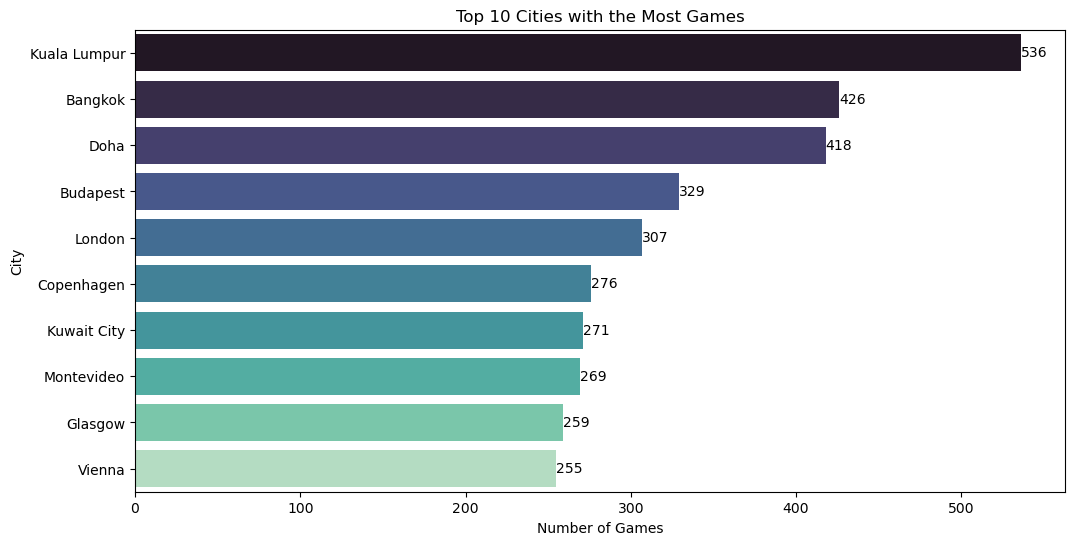

In [243]:

# Count the number of games per city
city_counts = results['city'].value_counts()

# Find the city with the most games
most_games_city = city_counts.idxmax()
most_games_count = city_counts.max()

print(f"The city with the most games is {most_games_city} with {most_games_count} games.")

# Plotting the top 10 cities with the most games
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette='mako')
plt.title('Top 10 Cities with the Most Games')
plt.xlabel('Number of Games')
plt.ylabel('City')

# Annotate the number of games on the bars
for index, value in enumerate(city_counts.head(10).values):
    plt.text(value, index, str(value), color='black', ha='left', va='center')

plt.show()

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_5044/2127664786.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tournament_counts_in_city.values, y=tournament_counts_in_city.index, palette='viridis')


The city with the most games is Kuala Lumpur with 536 games.


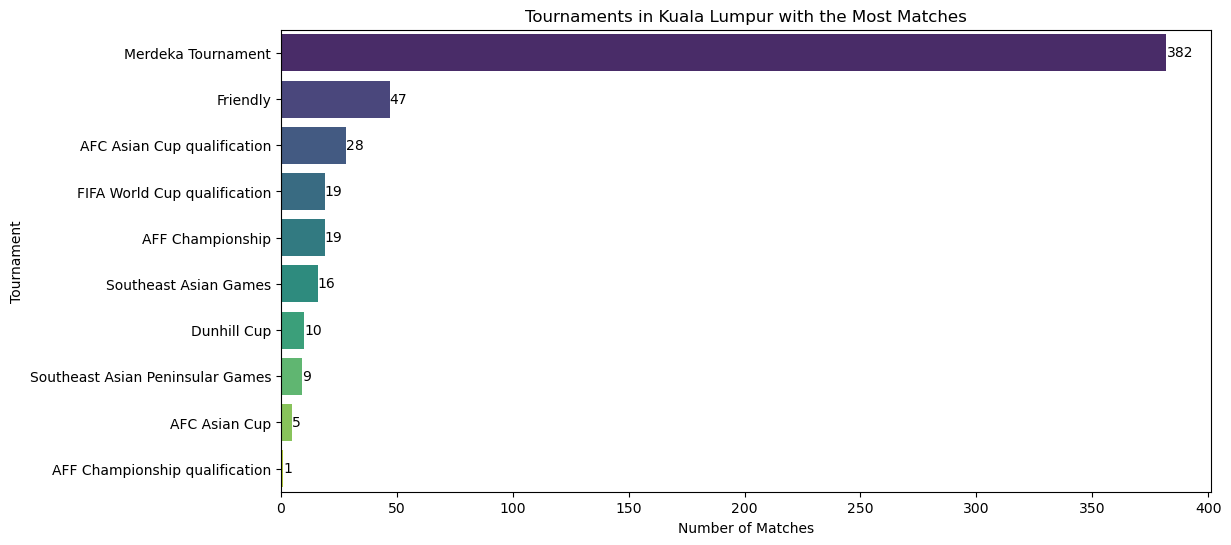

In [244]:
# Count the number of games per city
city_counts = results['city'].value_counts()

# Find the city with the most games
most_games_city = city_counts.idxmax()
most_games_count = city_counts.max()

print(f"The city with the most games is {most_games_city} with {most_games_count} games.")

# Filter the dataset for the city with the most games
city_results = results[results['city'] == most_games_city]

# Count the number of matches per tournament in that city
tournament_counts_in_city = city_results['tournament'].value_counts()

# Plotting the tournaments with the most matches in that city
plt.figure(figsize=(12, 6))
sns.barplot(x=tournament_counts_in_city.values, y=tournament_counts_in_city.index, palette='viridis')
plt.title(f'Tournaments in {most_games_city} with the Most Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Tournament')

# Annotate the number of matches on the bars
for index, value in enumerate(tournament_counts_in_city.values):
    plt.text(value, index, str(value), color='black', ha='left', va='center')

plt.show()

The most matches were played in Kuala Lumpur. The most frequent tournament held in Kuala Lumpur is the Merdeka Tournament.

## 4- Feature Engineering

In [245]:
results['month']=results['date'].dt.month

seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}

results['season'] = results['month'].map(seasons)


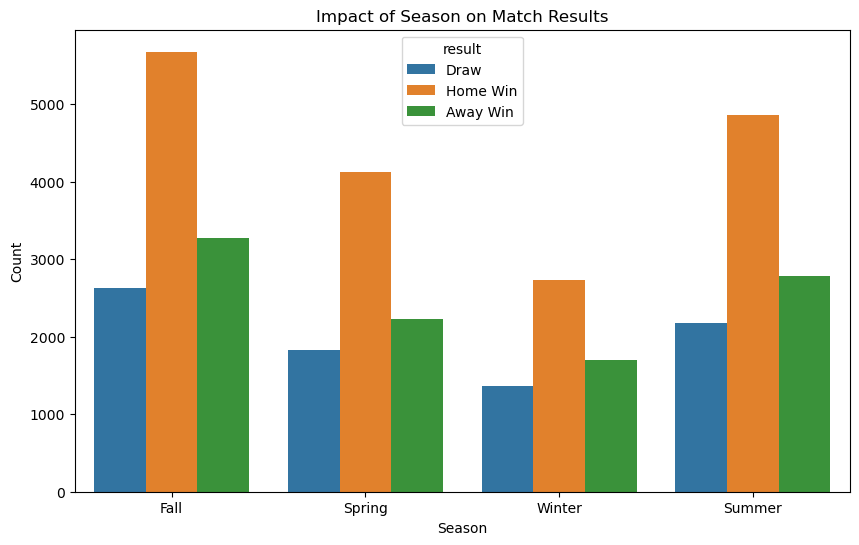

In [246]:
results['goal_diffrence'] = results['home_score'] - results['away_score']

plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='result', data=results)
plt.title('Impact of Season on Match Results')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

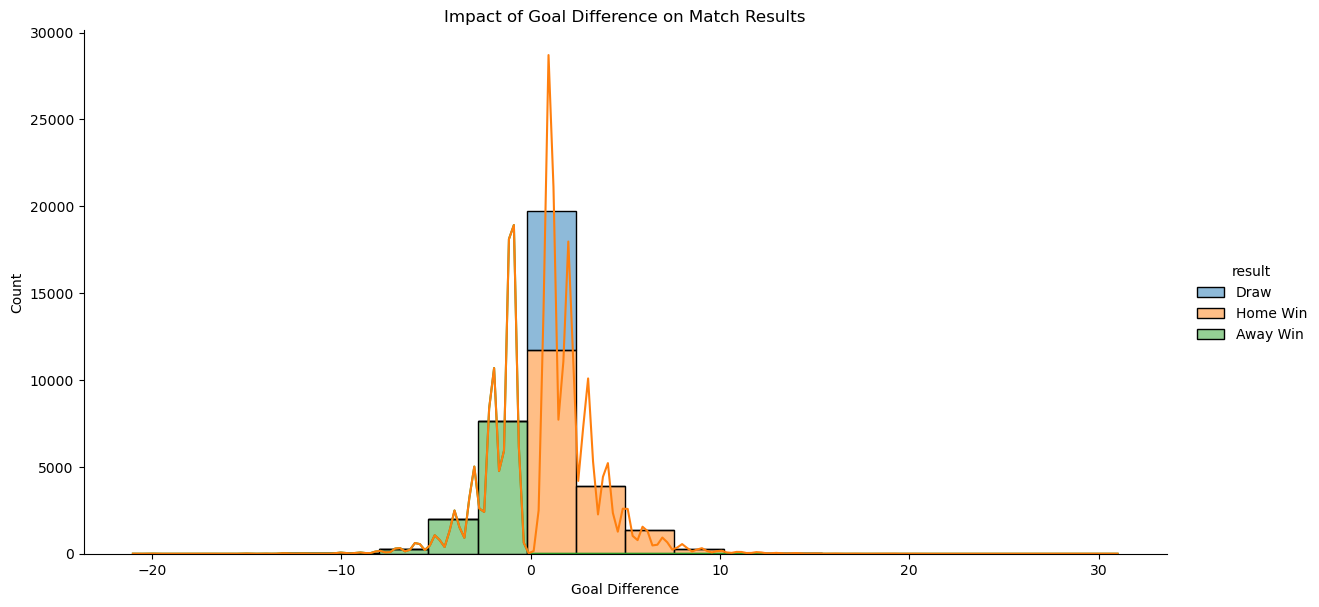

In [247]:
# Visualize the impact of the 'goal_difference' feature on match results
plt.figure(figsize=(12, 6))
sns.displot(results, x='goal_diffrence', bins=20, kde=True, hue='result', multiple='stack', height=6, aspect=2)
plt.title('Impact of Goal Difference on Match Results')
plt.xlabel('Goal Difference')
plt.ylabel('Count')
plt.show()

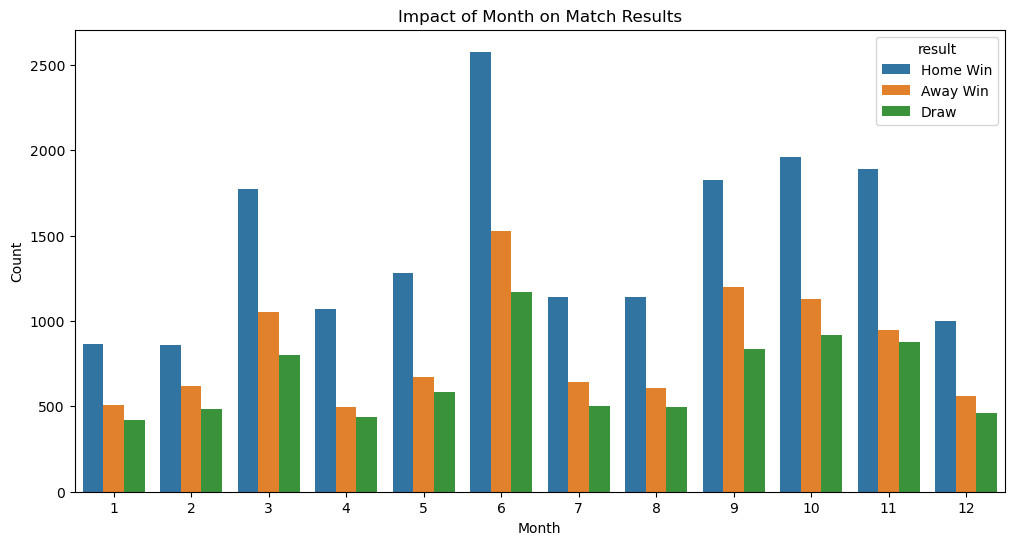

In [248]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='result', data=results)
plt.title('Impact of Month on Match Results')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [249]:
# Feature for whether the match was a high-scoring game
results['high_scoring'] = (results['home_score'] + results['away_score']) > 3
results['high_scoring'] = results['high_scoring'].astype(int)

/var/folders/cj/j3vhqkfj15734l8tr2dnw9h00000gn/T/ipykernel_5044/2345842140.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_scoring_counts.index, y=high_scoring_counts.values, palette='viridis')


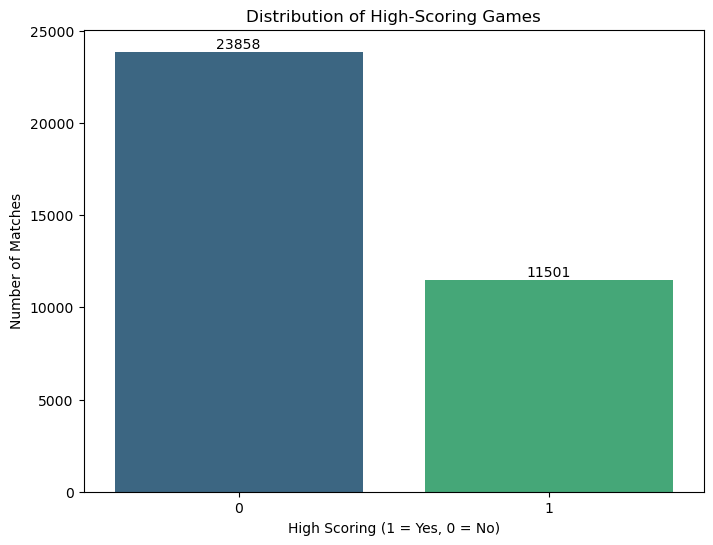

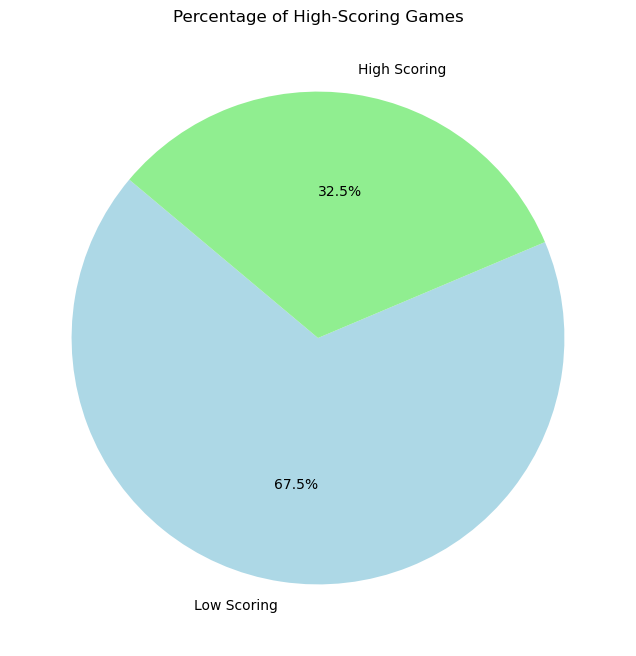

In [250]:
# Count the number of high-scoring and low-scoring games
high_scoring_counts = results['high_scoring'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=high_scoring_counts.index, y=high_scoring_counts.values, palette='viridis')
plt.title('Distribution of High-Scoring Games')
plt.xlabel('High Scoring (1 = Yes, 0 = No)')
plt.ylabel('Number of Matches')

# Annotate the number of matches on the bars
for index, value in enumerate(high_scoring_counts.values):
    plt.text(index, value, str(value), color='black', ha='center', va='bottom')

plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
labels = ['Low Scoring', 'High Scoring']
sizes = high_scoring_counts.values
colors = ['lightblue', 'lightgreen']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Percentage of High-Scoring Games')
plt.show()

I created matches win by seasons and months. Also, I checked if they scored high or low. The most matches are won in Summer and Fall. Additionally, most matches have fewer than 3 goals.